Repo root resolved to: /mnt/c/Users/ircal/OneDrive/AIML/aiml-glossary
Repo root contents: ['.git', '.github', '.gitignore', '.venv', 'aiml-glossary.code-workspace', 'ari_bar.png', 'cluster_assignments.csv', 'data', 'dev-requirements.txt', 'experiments', 'index.html', 'makefile', 'mlruns', 'notebooks', 'output', 'README.txt', 'requirements.txt', 'semantic_clusters.csv', 'src', 'templates', 'tests', 'visualizations']
Added repo root to sys.path
src/ exists: True
src/ contents: ['clustering.py', 'cluster_analysis.py', 'cluster_terms.py', 'convert_glossary.py', 'coverage_report.py', 'enrich_glossary.py', 'evaluate_clusters.py', 'generate_outputs.py', 'link_dictionary.py', 'render_templates.py', 'semantic_clustering.py', 'validate_glossary.py', '__init__.py', '__pycache__']
Import spec for 'src': ModuleSpec(name='src', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7eb1b51e40d0>, origin='/mnt/c/Users/ircal/OneDrive/AIML/aiml-glossary/src/__init__.py', submodule_search_locat

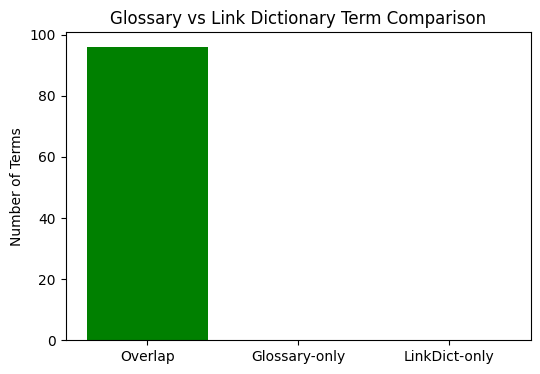

📁 Bar chart saved to /mnt/c/Users/ircal/OneDrive/AIML/aiml-glossary/visualizations/glossary_linkdict_bar.png


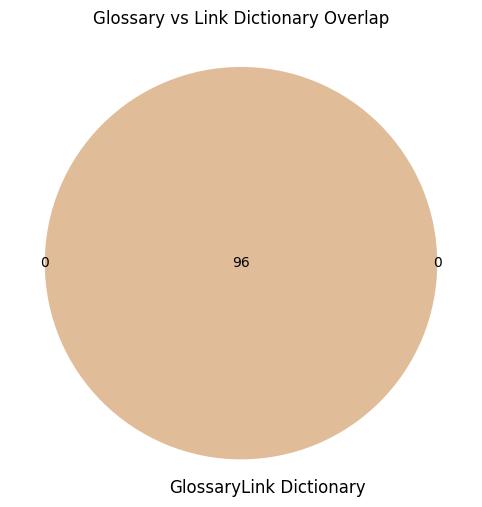

📁 Venn diagram saved to /mnt/c/Users/ircal/OneDrive/AIML/aiml-glossary/visualizations/glossary_linkdict_venn.png


In [1]:
# %% Diagnostic: Verify repo root, src package, and data integrity with visualization

import sys
from pathlib import Path
import importlib.util
import json
import matplotlib.pyplot as plt

# Try to import venn2, fall back if not available
try:
    from matplotlib_venn import venn2
    HAS_VENN = True
except ImportError:
    HAS_VENN = False
    print("ℹ️ matplotlib-venn not installed; skipping Venn diagram.")

# Assume notebook is inside notebooks/, so repo root is parent
REPO_ROOT = Path.cwd().parent

print("Repo root resolved to:", REPO_ROOT)
print("Repo root contents:", [p.name for p in REPO_ROOT.iterdir()])

# Ensure repo root is on sys.path
if str(REPO_ROOT) not in sys.path:
    sys.path.insert(0, str(REPO_ROOT))
    print("Added repo root to sys.path")

# Check if src/ exists
src_path = REPO_ROOT / "src"
print("src/ exists:", src_path.exists())
print("src/ contents:", [p.name for p in src_path.iterdir()] if src_path.exists() else "N/A")

# Verify Python can import src
spec = importlib.util.find_spec("src")
print("Import spec for 'src':", spec)

# --- Sanity check: critical data files ---
glossary_path = REPO_ROOT / "data" / "aiml_glossary.json"
link_dict_path = REPO_ROOT / "data" / "link_dictionary.json"

if glossary_path.exists():
    with open(glossary_path, encoding="utf-8") as f:
        glossary = json.load(f)
    glossary_terms = {entry.get("term", "").strip() for entry in glossary}
    glossary_count = len(glossary_terms)
    print(f"✅ Glossary file exists: {glossary_path} ({glossary_count} entries)")
else:
    raise FileNotFoundError(f"❌ Glossary file missing at expected location: {glossary_path}")

if link_dict_path.exists():
    with open(link_dict_path, encoding="utf-8") as f:
        link_dict = json.load(f)
    link_dict_terms = set(link_dict.keys())
    link_dict_count = len(link_dict_terms)
    print(f"✅ Link dictionary file exists: {link_dict_path} ({link_dict_count} terms)")
else:
    raise FileNotFoundError(f"❌ Link dictionary file missing at expected location: {link_dict_path}")

# --- Cross-check counts and mismatches ---
if glossary_count != link_dict_count:
    print(f"⚠️ Mismatch detected: Glossary has {glossary_count} entries, but link dictionary has {link_dict_count} terms.")
    missing_in_link_dict = sorted(glossary_terms - link_dict_terms)
    if missing_in_link_dict:
        print("First few glossary terms missing from link dictionary:", missing_in_link_dict[:5])
    extra_in_link_dict = sorted(link_dict_terms - glossary_terms)
    if extra_in_link_dict:
        print("First few link dictionary terms not in glossary:", extra_in_link_dict[:5])
else:
    print(f"✅ Counts match: both glossary and link dictionary have {glossary_count} terms.")

# --- Summary statistic: overlap percentage ---
overlap_terms = glossary_terms & link_dict_terms
overlap_count = len(overlap_terms)
overlap_percent = (overlap_count / glossary_count * 100) if glossary_count else 0.0

print(f"📊 Overlap summary: {overlap_count}/{glossary_count} glossary terms ({overlap_percent:.1f}% overlap with link dictionary)")

# --- Visualization output directory ---
viz_dir = REPO_ROOT / "visualizations"
viz_dir.mkdir(exist_ok=True)

# --- Visualization: bar chart of overlap vs mismatch ---
labels = ["Overlap", "Glossary-only", "LinkDict-only"]
values = [overlap_count, len(glossary_terms - link_dict_terms), len(link_dict_terms - glossary_terms)]

plt.figure(figsize=(6,4))
plt.bar(labels, values, color=["green", "orange", "red"])
plt.title("Glossary vs Link Dictionary Term Comparison")
plt.ylabel("Number of Terms")
bar_path = viz_dir / "glossary_linkdict_bar.png"
plt.savefig(bar_path, dpi=150, bbox_inches="tight")
plt.show()
print(f"📁 Bar chart saved to {bar_path}")

# --- Visualization: Venn diagram of overlap (optional) ---
if HAS_VENN:
    plt.figure(figsize=(6,6))
    venn2([glossary_terms, link_dict_terms], set_labels=("Glossary", "Link Dictionary"))
    plt.title("Glossary vs Link Dictionary Overlap")
    venn_path = viz_dir / "glossary_linkdict_venn.png"
    plt.savefig(venn_path, dpi=150, bbox_inches="tight")
    plt.show()
    print(f"📁 Venn diagram saved to {venn_path}")


In [2]:
# %% Status summary: glossary vs link dictionary integrity (CI/CD friendly with safeguard)

import datetime
import sys

# Reuse glossary_terms, link_dict_terms from diagnostic cell
expected_count = len(glossary_terms)
actual_count = len(link_dict_terms)
overlap = len(glossary_terms & link_dict_terms)
percent = (overlap / expected_count * 100) if expected_count else 0.0

status = (
    f"✅ Link dictionary integrity: {overlap}/{expected_count} terms matched "
    f"({percent:.1f}% overlap)"
    if overlap == expected_count and actual_count == expected_count
    else f"⚠️ Link dictionary mismatch: {overlap}/{expected_count} terms matched "
         f"({percent:.1f}% overlap)"
)

print(status)

# --- Write status to file for CI/CD ---
output_dir = REPO_ROOT / "output"
output_dir.mkdir(exist_ok=True)

timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
status_file = output_dir / f"integrity_status_{timestamp}.txt"

with open(status_file, "w", encoding="utf-8") as f:
    f.write(status + "\n")

print(f"📁 Status written to {status_file}")

# --- Safeguard: exit with non-zero code if mismatch ---
if overlap != expected_count or actual_count != expected_count:
    print("❌ Integrity check failed — exiting with non-zero code for CI/CD.")
    sys.exit(1)


✅ Link dictionary integrity: 96/96 terms matched (100.0% overlap)
📁 Status written to /mnt/c/Users/ircal/OneDrive/AIML/aiml-glossary/output/integrity_status_20251213-204719.txt


In [ ]:
# %% CI/CD environment setup guard
import os, sys

# Pause flag check
if os.path.exists(".pause-ci"):
    print("CI/CD paused. Exiting notebook early.")
    sys.exit(0)

# MLflow setup
import mlflow
if "GITHUB_ACTIONS" in os.environ:
    os.environ["MLFLOW_TRACKING_URI"] = "file:./experiments/mlruns"

print("MLflow tracking URI:", os.environ.get("MLFLOW_TRACKING_URI"))


# AIML Glossary Runtime Notebook

This notebook orchestrates the AIML Glossary workflow with **conditional dispatch**:
- Each step checks prerequisites before running.
- Prevents wasted compute if inputs are missing or invalid.
- Logs results to MLflow when conditions are met.

This notebook orchestrates the AIML Glossary workflow end-to-end:
- Generate glossary outputs
- Run clustering analyses
- Evaluate clusters
- Log experiments in MLflow
- Visualize results

Scripts in `src/` provide modular functions. This notebook calls them in sequence.


## Dispatch Matrix – AIML Glossary Workflow

| Step                        | Inputs (must exist/valid)                          | Outputs (produced)                          | Condition to Dispatch                           |
|-----------------------------|----------------------------------------------------|---------------------------------------------|------------------------------------------------|
| CI/CD Environment Setup     | `.pause-ci` flag absent, MLflow URI configured     | MLflow experiment context                   | Run only if CI/CD not paused                   |
| Generate Glossary Outputs   | `data/aiml_glossary.json`, `data/link_dictionary.json` | `output/glossary.md`, `output/glossary.xhtml` | Dispatch if glossary + link dictionary present |
| Graph Clustering (Louvain)  | `data/aiml_glossary.json`                          | `output/cluster_assignments.csv`            | Dispatch if glossary file exists               |
| Semantic Clustering (KMeans)| `data/aiml_glossary.json`                          | `output/semantic_clusters.csv`              | Dispatch if glossary file exists               |
| Evaluate Clusters (ARI)     | `output/cluster_assignments.csv`, `output/semantic_clusters.csv` | `output/ari_metrics.json`, plots in `visualizations/` | Dispatch if both cluster files exist           |
| Parameter Sweep (KMeans)    | `data/aiml_glossary.json`                          | Multiple `semantic_clusters_k*.csv` files, metrics | Dispatch if glossary file exists               |
| Parameter Sweep (Louvain)   | `data/aiml_glossary.json`                          | Multiple `graph_clusters_res*.csv` files, metrics | Dispatch if glossary file exists               |
| Plot Sweep Results          | Sweep result files (`semantic_clusters_k*.csv`, `graph_clusters_res*.csv`) | Visualizations in `visualizations/`         | Dispatch if sweep results exist                |
| MLflow UI                   | MLflow tracking URI, experiment runs logged        | Web UI at `http://127.0.0.1:5000`           | Dispatch if MLflow backend store initialized   |
| Publishing Pipeline (CI/CD) | Updated outputs in `output/`                       | Deployed site via GitHub Pages              | Dispatch if outputs regenerated and pipeline green |


## Workflow DAG – AIML Glossary

The diagram below shows the state-based workflow logic. Each node represents a step, and arrows indicate dependencies. Preconditions are annotated to show when each step is eligible to run.

![AIML Glossary Workflow DAG](../visualizations/dag_aiml_glossary.png)


In [3]:
# %% Imports and environment setup
import os
import sys
from pathlib import Path
import mlflow

# Add repo root to Python path
repo_root = Path(__file__).resolve().parent if "__file__" in globals() else Path.cwd()
if str(repo_root) not in sys.path:
    sys.path.append(str(repo_root))

from src.generate_outputs import generate_outputs
from src.cluster_analysis import run_graph_clustering
from src.semantic_clustering import run_semantic_clustering
from src.evaluate_clusters import evaluate_clusters

DATA_DIR = Path("data")
OUTPUT_DIR = Path("output")
VIS_DIR = Path("visualizations")
EXPERIMENT_NAME = "AIML Glossary Analysis"

mlflow.set_experiment(EXPERIMENT_NAME)

# Helper: check file existence
def require(path: Path, description: str):
    if not path.exists() or path.stat().st_size == 0:
        print(f"❌ Missing {description}: {path}")
        return False
    print(f"✅ Found {description}: {path}")
    return True


In [ ]:
import os, sys
print("CWD:", os.getcwd())
print("sys.path:", sys.path[:5])  # show first few entries
print("Contents:", os.listdir())


In [ ]:
# %% Generate glossary outputs
glossary_file = DATA_DIR / "aiml_glossary.json"
link_dict_file = DATA_DIR / "link_dictionary.json"

if require(glossary_file, "glossary") and require(link_dict_file, "link dictionary"):
    with mlflow.start_run(run_name="generate_outputs"):
        generate_outputs(
            glossary_path=str(glossary_file),
            link_dict_path=str(link_dict_file),
            output_dir=str(OUTPUT_DIR)
        )
        mlflow.log_artifacts(str(OUTPUT_DIR), artifact_path="outputs")
else:
    print("Skipping glossary generation due to missing prerequisites.")



In [ ]:
# %% Run graph clustering (Louvain)
glossary_file = DATA_DIR / "aiml_glossary.json"
if require(glossary_file, "glossary"):
    with mlflow.start_run(run_name="graph_clustering"):
        graph_clusters = run_graph_clustering(
            glossary_path=str(glossary_file),
            output_path=str(OUTPUT_DIR / "cluster_assignments.csv")
        )
        mlflow.log_artifact(str(OUTPUT_DIR / "cluster_assignments.csv"))
else:
    print("Skipping graph clustering: glossary not ready.")


In [ ]:
# %% Run semantic clustering (TF-IDF + KMeans)
glossary_file = DATA_DIR / "aiml_glossary.json"
if require(glossary_file, "glossary"):
    with mlflow.start_run(run_name="semantic_clustering"):
        semantic_clusters = run_semantic_clustering(
            glossary_path=str(glossary_file),
            output_path=str(OUTPUT_DIR / "semantic_clusters.csv")
        )
        mlflow.log_artifact(str(OUTPUT_DIR / "semantic_clusters.csv"))
else:
    print("Skipping semantic clustering: glossary not ready.")



In [ ]:
# %% Evaluate clusters (ARI comparison)
graph_clusters_file = OUTPUT_DIR / "cluster_assignments.csv"
semantic_clusters_file = OUTPUT_DIR / "semantic_clusters.csv"

if require(graph_clusters_file, "graph clusters") and require(semantic_clusters_file, "semantic clusters"):
    with mlflow.start_run(run_name="evaluate_clusters"):
        metrics = evaluate_clusters(
            graph_clusters_path=str(graph_clusters_file),
            semantic_clusters_path=str(semantic_clusters_file),
            output_path=str(OUTPUT_DIR / "ari_metrics.json"),
            vis_dir=str(VIS_DIR)
        )
        mlflow.log_artifact(str(OUTPUT_DIR / "ari_metrics.json"))
        mlflow.log_artifacts(str(VIS_DIR), artifact_path="plots")
else:
    print("Skipping evaluation: cluster files not ready.")



# 🚀 Full AIML Glossary Workflow

This cell runs the **entire glossary pipeline end‑to‑end** in one go.  
It stitches together all the individual steps you’ve seen above:

1. **Validation** – checks that the glossary JSON is well‑formed.  
2. **Output generation** – produces Markdown and XHTML files, plus a link coverage report.  
3. **Conversion** – re‑parses Markdown back into JSON for consistency.  
4. **Graph clustering (Louvain)** – builds a network of glossary terms and clusters them.  
5. **Semantic clustering (TF‑IDF + KMeans)** – groups terms based on their definitions.  
6. **Combined clustering** – compares graph vs semantic clusters using Adjusted Rand Index (ARI).  
7. **Evaluation** – saves metrics, logs results to MLflow, and generates dashboard plots.

📌 **When to use this cell:**  
- Run it if you want a **one‑shot execution** of the full workflow without stepping through each cell.  
- It’s especially useful for CI/CD runs or quick validation after making changes.  
- If you’re debugging or developing, you can still run the individual step cells above.

➡️ After this cell, the runbook continues with **parameter sweeps for KMeans clustering**, which build on the outputs generated here.


In [4]:
# %% Full AIML Glossary Workflow (Explicit Paths + Diagnostics)

from pathlib import Path

from src.generate_outputs import generate_outputs
from src.convert_glossary import convert_glossary
from src.validate_glossary import validate_glossary
from src.cluster_analysis import run_graph_clustering
from src.semantic_clustering import run_semantic_clustering
from src.clustering import run_combined_clustering
from src.evaluate_clusters import evaluate_clusters

# Resolve repo root (already set in diagnostic cell)
repo_root = Path.cwd().parent

# Define explicit paths
glossary_file   = repo_root / "data" / "aiml_glossary.json"
link_dict_file  = repo_root / "data" / "link_dictionary.json"
template_dir    = repo_root / "templates"
output_dir      = repo_root / "output"
visual_dir      = repo_root / "visualizations"

# --- Diagnostics: Confirm paths exist ---
print("Repo root:", repo_root)
print("Glossary file exists:", glossary_file.exists(), glossary_file)
print("Link dictionary exists:", link_dict_file.exists(), link_dict_file)
print("Template dir exists:", template_dir.exists(), template_dir)
print("Output dir exists:", output_dir.exists(), output_dir)
print("Visualizations dir exists:", visual_dir.exists(), visual_dir)

# --- Step 1: Generate outputs (Markdown + XHTML + link coverage) ---
print("\n▶ Generating glossary outputs...")
glossary, link_dict = generate_outputs(
    glossary_file=glossary_file,
    link_dict_file=link_dict_file,
    template_dir=template_dir,
    output_dir=output_dir
)

# %% Sanity check: link dictionary file
from pathlib import Path
link_dict_path = REPO_ROOT / "data" / "link_dictionary.json"
if link_dict_path.exists():
    print("✅ Link dictionary file exists:", link_dict_path)
else:
    print("❌ Link dictionary file missing:", link_dict_path)

import json
from pathlib import Path

with open(REPO_ROOT / "data" / "link_dictionary.json", encoding="utf-8") as f:
    link_dict = json.load(f)

print("Sample links:")
for term, links in list(link_dict.items())[:10]:
    print(f"{term} → {links}")

# %% Diagnostic: Top 10 most-linked terms (hub check)
import json
from pathlib import Path

# Load the link dictionary
with open(REPO_ROOT / "data" / "link_dictionary.json", encoding="utf-8") as f:
    link_dict = json.load(f)

# Count links per term
link_counts = {term: len(links) for term, links in link_dict.items()}

# Sort terms by number of links (descending)
top_hubs = sorted(link_counts.items(), key=lambda x: x[1], reverse=True)[:10]

print("\n🔎 Top 10 most-linked terms (hubs):")
for term, count in top_hubs:
    print(f"{term}: {count} links")

# --- Step 2: Convert Markdown → JSON ---
print("\n▶ Converting glossary Markdown → JSON...")
converted = convert_glossary(
    markdown_file=output_dir / "glossary.md",
    json_file=output_dir / "glossary_converted.json"
)

# --- Step 3: Validate glossary JSON ---
print("\n▶ Validating glossary...")
validate_glossary(glossary_file)

# --- Step 4: Run graph clustering (Louvain) ---
print("\n▶ Running graph clustering...")
graph_df, partition, G = run_graph_clustering(glossary_file=glossary_file)

# --- Step 5: Run semantic clustering (TF-IDF + KMeans) ---
print("\n▶ Running semantic clustering...")
semantic_df, model = run_semantic_clustering(glossary_file=glossary_file)

# --- Step 6: Run combined clustering + ARI comparison ---
print("\n▶ Running combined clustering + ARI comparison...")
graph_df2, semantic_df2, ari = run_combined_clustering(glossary_file=glossary_file)

# --- Step 7: Evaluate clusters (ARI + dashboard plots) ---
print("\n▶ Evaluating clusters...")
from src.evaluate_clusters import evaluate_clusters
summary = evaluate_clusters()
print("\n📊 Dashboard Summary")
for key, value in summary.items():
    print(f"{key}: {value}")

print("\n✅ Workflow complete.")
print(f"Final Adjusted Rand Index: {ari:.4f}")


Repo root: /mnt/c/Users/ircal/OneDrive/AIML/aiml-glossary
Glossary file exists: True /mnt/c/Users/ircal/OneDrive/AIML/aiml-glossary/data/aiml_glossary.json
Link dictionary exists: True /mnt/c/Users/ircal/OneDrive/AIML/aiml-glossary/data/link_dictionary.json
Template dir exists: True /mnt/c/Users/ircal/OneDrive/AIML/aiml-glossary/templates
Output dir exists: True /mnt/c/Users/ircal/OneDrive/AIML/aiml-glossary/output
Visualizations dir exists: True /mnt/c/Users/ircal/OneDrive/AIML/aiml-glossary/visualizations

▶ Generating glossary outputs...
▶ Updating link dictionary from /mnt/c/Users/ircal/OneDrive/AIML/aiml-glossary/data/aiml_glossary.json → /mnt/c/Users/ircal/OneDrive/AIML/aiml-glossary/data/link_dictionary.json
Link dictionary written to /mnt/c/Users/ircal/OneDrive/AIML/aiml-glossary/data/link_dictionary.json with 96 terms.
▶ Enriching glossary entries...
▶ Rendering templates into /mnt/c/Users/ircal/OneDrive/AIML/aiml-glossary/output...
▶ Reporting link coverage...
Coverage: 59/98

## 📊 Interpreting the Cluster Evaluation Dashboard

The evaluation step produces both a printed summary and two visualization files:

- **Cluster Counts Comparison (`visualizations/cluster_counts_comparison.png`)**  
  This bar chart shows the number of clusters detected by the **graph clustering** (based on glossary link structure) versus the **semantic clustering** (based on TF‑IDF + KMeans).  
  - A large difference suggests that the glossary’s link structure and semantic definitions group terms differently.  
  - A similar count indicates alignment between structural and semantic views.

- **Adjusted Rand Index (ARI) Score (`visualizations/ari_score.png`)**  
  The ARI measures how similar the two clusterings are, correcting for chance.  
  - **ARI = 1.0** → Perfect agreement between graph and semantic clusters.  
  - **ARI ≈ 0.0** → No meaningful agreement beyond random chance.  
  - **Negative ARI** → Worse than random alignment.  

- **Printed summary metrics**  
  - Number of nodes and edges in the graph.  
  - Number of clusters found by each method.  
  - ARI score and number of terms compared.

Together, these outputs give contributors a quick dashboard view of how well the glossary’s link‑based structure aligns with semantic similarity in definitions.


# 📊 AIML Glossary Workflow DAG (ASCII Diagram)

The diagram below illustrates how each step depends on the previous ones:
AIML Glossary Workflow DAG
==========================

          +-------------------------+
          | Validate Glossary JSON  |
          +-----------+-------------+
                      |
                      v
          +-------------------------+
          | Generate Outputs        |
          | (Markdown, XHTML, Links)|
          +-----------+-------------+
                      |
                      v
          +-------------------------+
          | Convert Markdown -> JSON|
          +-----------+-------------+
                      |
        +-------------+-------------+
        |                           |
        v                           v
+-------------------+       +-------------------+
| Graph Clustering  |       | Semantic Clustering|
| (Louvain)         |       | (TF-IDF + KMeans) |
+---------+---------+       +---------+---------+
          |                           |
          +-------------+-------------+
                        |
                        v
          +-------------------------+
          | Combined Clustering +   |
          | ARI Comparison          |
          +-----------+-------------+
                      |
                      v
          +-------------------------+
          | Evaluate Clusters       |
          | (ARI + Dashboard plots) |
          +-------------------------+


In [5]:
# %% Extended comparison sweep: KMeans, Agglomerative, Louvain resolution sweep with MLflow metrics + artifacts

import json
import tempfile
from pathlib import Path
import numpy as np
import mlflow
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.neighbors import NearestNeighbors

# Optional deps for Louvain
HAS_LOUVAIN = True
try:
    import networkx as nx
    import community as community_louvain  # python-louvain
except Exception as e:
    HAS_LOUVAIN = False
    print(f"ℹ️ Louvain not available ({e}); will compare KMeans vs Agglomerative only.")

# --- Repo root and glossary ---
REPO_ROOT = Path.cwd().parent
glossary_path = REPO_ROOT / "data" / "aiml_glossary.json"

if not glossary_path.exists():
    raise FileNotFoundError(f"❌ Missing glossary: {glossary_path}")

# --- Import your embedding helper ---
from src.semantic_clustering import embed_terms

# Generate embeddings using your real pipeline
terms, X = embed_terms()
print(f"✅ Generated embeddings for {len(terms)} terms, shape={X.shape}")

# --- Build kNN graph for Louvain (cosine distance) ---
G = None
if HAS_LOUVAIN:
    try:
        nn = NearestNeighbors(n_neighbors=min(10, len(terms) - 1), metric="cosine")
        nn.fit(X)
        distances, indices = nn.kneighbors(X)
        G = nx.Graph()
        for i in range(len(terms)):
            G.add_node(i)
            for j_idx, dist in zip(indices[i], distances[i]):
                if i == j_idx:
                    continue
                sim = 1.0 - float(dist)
                if G.has_edge(i, j_idx):
                    if sim > G[i][j_idx]["weight"]:
                        G[i][j_idx]["weight"] = sim
                else:
                    G.add_edge(i, j_idx, weight=sim)
        print(f"✅ Louvain graph built with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
    except Exception as e:
        HAS_LOUVAIN = False
        print(f"ℹ️ Louvain graph construction failed ({e}); continuing without Louvain.")

# --- MLflow setup ---
mlflow.set_tracking_uri(str(REPO_ROOT / "mlruns"))
mlflow.set_experiment("clustering_comparison")

# --- Sweep parameters ---
ks = list(range(2, min(10, len(terms)) + 1))
louvain_resolutions = [0.5, 1.0, 1.5, 2.0]

# --- Run sweeps ---
for k in ks:
    with mlflow.start_run(run_name=f"KMeans_vs_Agg_k={k}"):
        # KMeans
        km = KMeans(n_clusters=k, random_state=42, n_init="auto")
        kmeans_labels = km.fit_predict(X)

        # Agglomerative (requires dense array)
        agg = AgglomerativeClustering(n_clusters=k, linkage="ward")
        agglom_labels = agg.fit_predict(X.toarray())

        # ARI between methods
        ari_km_vs_agg = adjusted_rand_score(kmeans_labels, agglom_labels)
        mlflow.log_metric("ari_kmeans_vs_agglomerative", ari_km_vs_agg)
        mlflow.log_param("clusters", k)
        mlflow.log_param("method", "comparison_sweep")

        print(f"k={k}: KMeans vs Agg={ari_km_vs_agg:.4f}")

        # --- Save KMeans & Agglomerative assignments as artifact ---
        assignments = {
            "kmeans": {term: int(label) for term, label in zip(terms, kmeans_labels)},
            "agglomerative": {term: int(label) for term, label in zip(terms, agglom_labels)},
        }
        with tempfile.NamedTemporaryFile("w", delete=False, suffix=".json") as tmpfile:
            json.dump(assignments, tmpfile, indent=2)
            tmpfile.flush()
            mlflow.log_artifact(tmpfile.name, artifact_path=f"clusters_k={k}")

        # --- Louvain comparisons ---
        if HAS_LOUVAIN and G is not None:
            for res in louvain_resolutions:
                partition = community_louvain.best_partition(G, weight="weight", resolution=res, random_state=42)
                louvain_labels = np.array([partition[i] for i in range(len(terms))])
                ari_km_vs_louvain = adjusted_rand_score(kmeans_labels, louvain_labels)
                ari_agg_vs_louvain = adjusted_rand_score(agglom_labels, louvain_labels)

                mlflow.log_metric(f"ari_kmeans_vs_louvain_res{res}", ari_km_vs_louvain)
                mlflow.log_metric(f"ari_agglomerative_vs_louvain_res{res}", ari_agg_vs_louvain)

                print(f"   Louvain res={res}: KMeans vs Louvain={ari_km_vs_louvain:.4f} | "
                      f"Agg vs Louvain={ari_agg_vs_louvain:.4f}")

                # Save Louvain assignments as artifact
                louvain_assignments = {term: int(label) for term, label in zip(terms, louvain_labels)}


✅ Generated embeddings for 98 terms, shape=(98, 945)
✅ Louvain graph built with 98 nodes and 588 edges.


2025/12/13 20:48:21 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



k=2: KMeans vs Agg=0.1497
   Louvain res=0.5: KMeans vs Louvain=0.0560 | Agg vs Louvain=0.0374
   Louvain res=1.0: KMeans vs Louvain=0.0972 | Agg vs Louvain=0.0560
   Louvain res=1.5: KMeans vs Louvain=0.0603 | Agg vs Louvain=0.0473
   Louvain res=2.0: KMeans vs Louvain=0.0702 | Agg vs Louvain=0.0444
k=3: KMeans vs Agg=0.0864
   Louvain res=0.5: KMeans vs Louvain=0.1141 | Agg vs Louvain=0.1572
   Louvain res=1.0: KMeans vs Louvain=0.1219 | Agg vs Louvain=0.2642
   Louvain res=1.5: KMeans vs Louvain=0.1193 | Agg vs Louvain=0.1785
   Louvain res=2.0: KMeans vs Louvain=0.0975 | Agg vs Louvain=0.1902
k=4: KMeans vs Agg=0.1784
   Louvain res=0.5: KMeans vs Louvain=0.2058 | Agg vs Louvain=0.1610
   Louvain res=1.0: KMeans vs Louvain=0.1927 | Agg vs Louvain=0.2634
   Louvain res=1.5: KMeans vs Louvain=0.2054 | Agg vs Louvain=0.1837
   Louvain res=2.0: KMeans vs Louvain=0.1973 | Agg vs Louvain=0.1946
k=5: KMeans vs Agg=0.1582
   Louvain res=0.5: KMeans vs Louvain=0.2303 | Agg vs Louvain=0.2141


📊 Visualizing cluster sizes for run a46e6412e2524c50991cd47a65499fe9 (params: {'clusters': '10', 'method': 'comparison_sweep'})


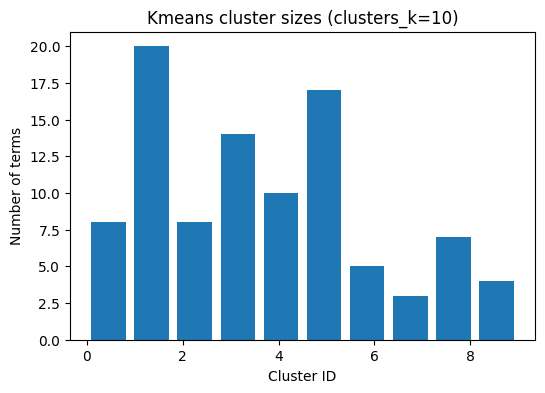

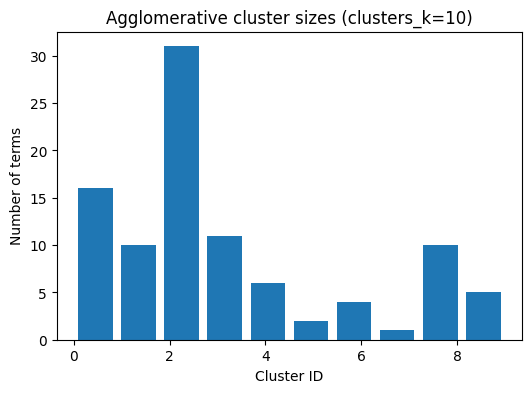


📊 Visualizing cluster sizes for run 8fde07cb56134806b39fbdc8fce9b505 (params: {'clusters': '9', 'method': 'comparison_sweep'})


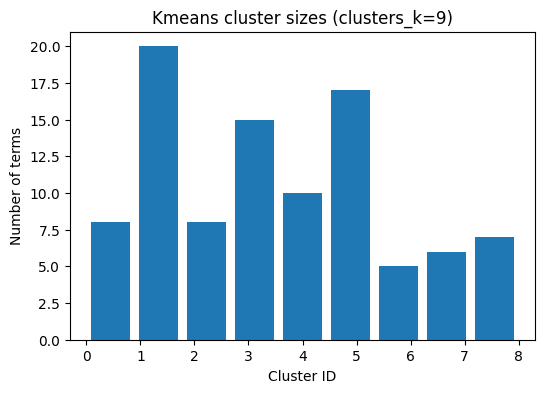

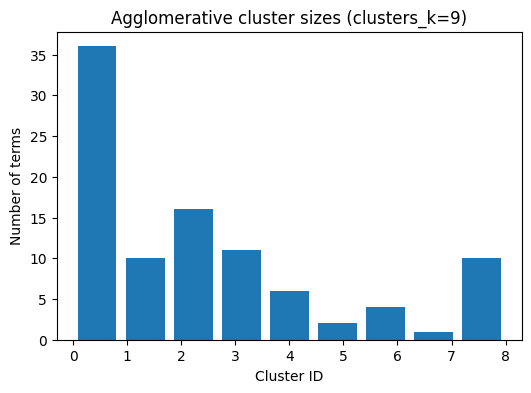


📊 Visualizing cluster sizes for run 71cc5e0011b043249520117667d7760f (params: {'clusters': '8', 'method': 'comparison_sweep'})


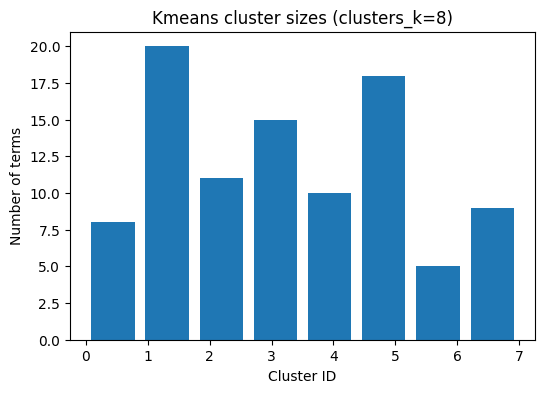

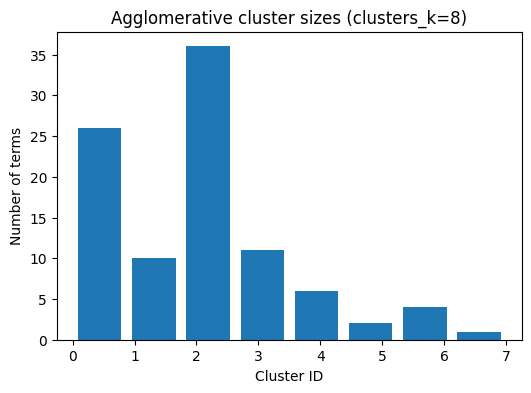

In [6]:
# %% Visualize cluster size distributions from MLflow artifacts

import mlflow
import json
import matplotlib.pyplot as plt
from pathlib import Path

# Point MLflow to the same tracking URI
mlflow.set_tracking_uri(str(REPO_ROOT / "mlruns"))
mlflow.set_experiment("clustering_comparison")

# Get the latest runs for inspection
client = mlflow.tracking.MlflowClient()
experiment = client.get_experiment_by_name("clustering_comparison")
runs = client.search_runs(experiment.experiment_id, order_by=["attributes.start_time desc"], max_results=3)

for run in runs:
    run_id = run.info.run_id
    print(f"\n📊 Visualizing cluster sizes for run {run_id} (params: {run.data.params})")

    # Download artifacts for this run
    artifacts = client.list_artifacts(run_id)
    for artifact in artifacts:
        if artifact.is_dir:
            # Look inside directories like clusters_k=5 or louvain_res=1.0_k=5
            sub_artifacts = client.list_artifacts(run_id, artifact.path)
            for sub in sub_artifacts:
                if sub.path.endswith(".json"):
                    local_path = client.download_artifacts(run_id, sub.path)
                    with open(local_path, "r", encoding="utf-8") as f:
                        assignments = json.load(f)

                    # Handle dicts of methods (kmeans/agglomerative) or single Louvain dict
                    if isinstance(assignments, dict) and "kmeans" in assignments:
                        for method, mapping in assignments.items():
                            labels = list(mapping.values())
                            plt.figure(figsize=(6,4))
                            plt.hist(labels, bins=len(set(labels)), rwidth=0.8)
                            plt.title(f"{method.capitalize()} cluster sizes ({artifact.path})")
                            plt.xlabel("Cluster ID")
                            plt.ylabel("Number of terms")
                            plt.show()
                    else:
                        labels = list(assignments.values())
                        plt.figure(figsize=(6,4))
                        plt.hist(labels, bins=len(set(labels)), rwidth=0.8)
                        plt.title(f"Louvain cluster sizes ({artifact.path})")
                        plt.xlabel("Cluster ID")
                        plt.ylabel("Number of terms")
                        plt.show()


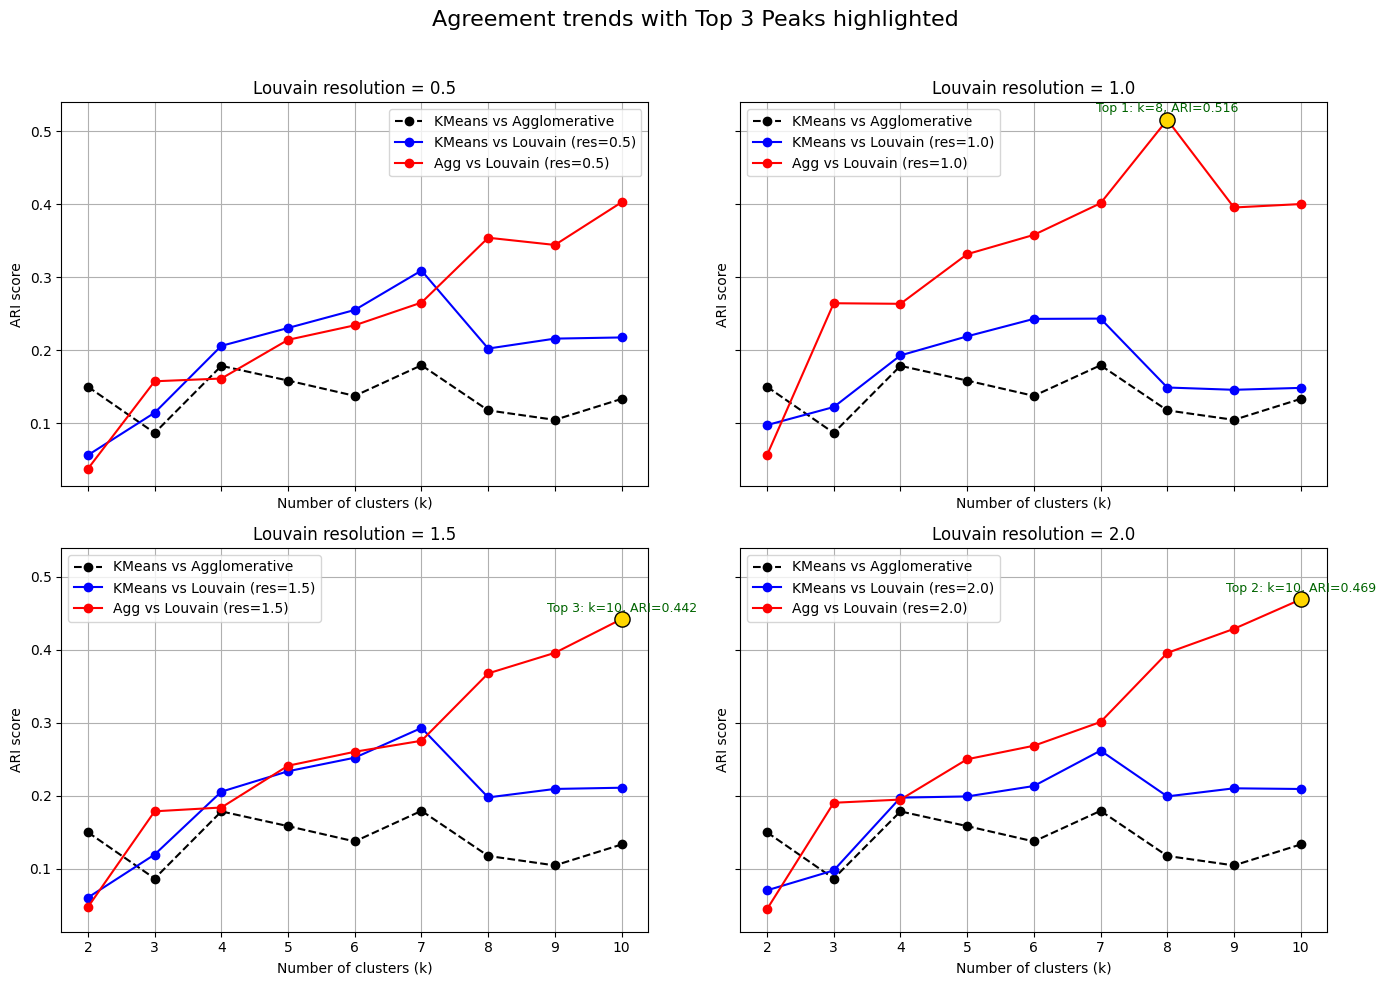

In [15]:
# %% Annotated ARI vs k plots with top 3 peaks highlighted

import matplotlib.pyplot as plt

# Group by clusters and average duplicate runs
df_grouped = df.groupby("clusters").mean(numeric_only=True).reset_index()

# Define Louvain resolutions to plot
resolutions = [0.5, 1.0, 1.5, 2.0]

# Identify top 3 peaks (reuse logic from peak-finding cell)
results = []
ari_cols = [col for col in df_grouped.columns if col.startswith("ari_")]
for col in ari_cols:
    for idx, row in df_grouped.iterrows():
        val = row[col]
        if pd.notnull(val):
            results.append({
                "clusters": int(row["clusters"]),
                "metric": col,
                "value": val
            })
results_sorted = sorted(results, key=lambda x: x["value"], reverse=True)
top3 = results_sorted[:3]

# Plot with annotations
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

for idx, res in enumerate(resolutions):
    ax = axes[idx]
    
    # Baseline: KMeans vs Agglomerative
    ax.plot(df_grouped["clusters"], df_grouped["ari_kmeans_vs_agglomerative"],
            marker="o", label="KMeans vs Agglomerative", color="black", linestyle="--")
    
    # KMeans vs Louvain
    km_key = f"ari_kmeans_vs_louvain_res{res}"
    ax.plot(df_grouped["clusters"], df_grouped[km_key],
            marker="o", label=f"KMeans vs Louvain (res={res})", color="blue")
    
    # Agg vs Louvain
    agg_key = f"ari_agglomerative_vs_louvain_res{res}"
    ax.plot(df_grouped["clusters"], df_grouped[agg_key],
            marker="o", label=f"Agg vs Louvain (res={res})", color="red")
    
    # Annotate top 3 peaks if they fall in this resolution
    for peak in top3:
        if f"res{res}" in peak["metric"]:
            ax.scatter(peak["clusters"], peak["value"], s=120, color="gold", edgecolor="black", zorder=5)
            ax.text(peak["clusters"], peak["value"]+0.01,
                    f"Top {top3.index(peak)+1}: k={peak['clusters']}, ARI={peak['value']:.3f}",
                    ha="center", fontsize=9, color="darkgreen")
    
    ax.set_title(f"Louvain resolution = {res}")
    ax.set_xlabel("Number of clusters (k)")
    ax.set_ylabel("ARI score")
    ax.grid(True)
    ax.legend()

plt.suptitle("Agreement trends with Top 3 Peaks highlighted", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [16]:
# %% Identify top 3 ARI agreement peaks across all runs

import numpy as np

# Group by clusters and average duplicate runs
df_grouped = df.groupby("clusters").mean(numeric_only=True).reset_index()

# Collect all ARI metric columns
ari_cols = [col for col in df_grouped.columns if col.startswith("ari_")]

# Gather all values with metadata
results = []
for col in ari_cols:
    for idx, row in df_grouped.iterrows():
        val = row[col]
        if pd.notnull(val):
            results.append({
                "clusters": int(row["clusters"]),
                "metric": col,
                "value": val
            })

# Sort by ARI value descending
results_sorted = sorted(results, key=lambda x: x["value"], reverse=True)

# Take top 3
top3 = results_sorted[:3]

print("🌟 Top 3 agreement peaks found:")
for rank, info in enumerate(top3, start=1):
    metric_name = info["metric"]
    if "kmeans_vs_agglomerative" in metric_name:
        method_desc = "KMeans vs Agglomerative"
        resolution_desc = "N/A"
    elif "kmeans_vs_louvain" in metric_name:
        method_desc = "KMeans vs Louvain"
        resolution_desc = metric_name.split("res")[-1]
    elif "agglomerative_vs_louvain" in metric_name:
        method_desc = "Agglomerative vs Louvain"
        resolution_desc = metric_name.split("res")[-1]
    else:
        method_desc = metric_name
        resolution_desc = "N/A"

    print(f"#{rank}: Method={method_desc}, Resolution={resolution_desc}, "
          f"k={info['clusters']}, ARI={info['value']:.4f}")


🌟 Top 3 agreement peaks found:
#1: Method=Agglomerative vs Louvain, Resolution=1.0, k=8, ARI=0.5157
#2: Method=Agglomerative vs Louvain, Resolution=2.0, k=10, ARI=0.4690
#3: Method=Agglomerative vs Louvain, Resolution=1.5, k=10, ARI=0.4421



From Copilot, for study

Organizing my thoughts and creating a plan

Structuring comparison
I need to lay out a plan comparing Louvain with KMeans and Agglomerative clustering. I'll suggest a placeholder for computing embeddings and building a graph for Louvain, making sure it falls back gracefully if Louvain isn’t installed. I'll also include the use of AgglomerativeClustering from sklearn and compute the ARI between KMeans and Louvain labels. The graph will be constructed from embeddings using cosine similarity, and instead of failing, it will skip gracefully if dependencies aren't found. I'll keep everything simple and make sure to save results, maybe in MLflow.

Building the kNN graph and clustering comparisons
I need to use sklearn’s NearestNeighbors to build the kNN graph and handle missing dependencies gracefully. If NearestNeighbors isn’t available, I’ll fallback to implementing cosine similarity manually. I'll load the glossary, create a placeholder for the embeddings, and parameterize a function to return embeddings. The kNN graph will use cosine similarity, and I’ll try to import community_louvain for Louvain. KMeans and AgglomerativeClustering will be used for k-means tests, and I’ll make sure the output is stored in a CSV and printed.

Done

In [7]:
# %% Post-Run Verification

from pathlib import Path

repo_root = Path.cwd().parent
output_dir = repo_root / "output"
visual_dir = repo_root / "visualizations"

print("\n📂 Output directory contents:")
if output_dir.exists():
    for f in sorted(output_dir.iterdir()):
        print(" -", f.name)
else:
    print("Output directory not found.")

print("\n📂 Visualizations directory contents:")
if visual_dir.exists():
    for f in sorted(visual_dir.iterdir()):
        print(" -", f.name)
else:
    print("Visualizations directory not found.")



📂 Output directory contents:
 - ari_metrics.json
 - cluster_assignments.csv
 - combined_clustering.json
 - coverage_report.json
 - coverage_report.txt
 - evaluation_summary.json
 - glossary.md
 - glossary.xhtml
 - glossary_converted.json
 - graph_stats.json
 - integrity_status_20251213-194152.txt
 - integrity_status_20251213-194529.txt
 - integrity_status_20251213-200736.txt
 - integrity_status_20251213-201453.txt
 - integrity_status_20251213-203226.txt
 - integrity_status_20251213-204719.txt
 - semantic_clusters.csv
 - semantic_clusters.json

📂 Visualizations directory contents:
 - ari_bar.png
 - ari_score.png
 - ari_trend.png
 - cluster_counts_comparison.png
 - dag_aiml_glossary.png
 - glossary_clusters.png
 - glossary_linkdict_bar.png
 - glossary_linkdict_venn.png
 - graph_clusters.png
 - semantic_clusters.png


In [ ]:
# %% Pipeline status badge

import mlflow

# Check embeddings
embeddings_ok = "X" in globals() and X is not None and hasattr(X, "shape")

# Check MLflow experiment
mlflow.set_tracking_uri(str(REPO_ROOT / "mlruns"))
client = mlflow.tracking.MlflowClient()
experiment = client.get_experiment_by_name("clustering_comparison")
runs = client.search_runs(experiment.experiment_id, max_results=5) if experiment else []

# Check metrics/artifacts presence
metrics_ok = any(run.data.metrics for run in runs)
artifacts_ok = any(client.list_artifacts(run.info.run_id) for run in runs)

# Decide badge
if embeddings_ok and metrics_ok and artifacts_ok:
    badge = "✅ Pipeline healthy: embeddings, metrics, and artifacts all present"
elif not embeddings_ok:
    badge = "❌ Embeddings missing — check embed_terms() cell"
elif not metrics_ok:
    badge = "❌ No metrics logged — check Extended Comparison Sweep cell"
elif not artifacts_ok:
    badge = "❌ No artifacts logged — check MLflow artifact logging"
else:
    badge = "⚠️ Partial pipeline health — investigate cells"

print(badge)


## ✅ CI/CD Integration Notes

- This notebook runs baseline workflow and parameter sweeps.
- GitHub Actions executes it on every push to `main`.
- Outputs and executed notebook are uploaded as artifacts.
- MLflow logs are written to `experiments/mlruns` (local) or remote if configured.



## Exploratory Lab Results

- **Semantic clustering sweeps:** Silhouette scores logged for multiple K values.
- **Graph clustering sweeps:** Cluster counts logged for multiple resolution parameters.
- **MLflow:** Each run is tracked with parameters, metrics, and artifacts.
- **Visualizations:** Sweep plots show how clustering quality and granularity vary.

This notebook now serves as both a baseline runbook and an exploratory lab.


To view experiment results, start the MLflow UI:


In [ ]:
mlflow ui --backend-store-uri experiments/mlruns

Open [http://127.0.0.1:5000](http://127.0.0.1:5000) in your browser.

Workflow Architecture
The AIML Glossary pipeline is modular by design. Each stage is handled by a dedicated helper module, orchestrated by `generate_outputs.py`.


Data inputs: glossary JSON, link dictionary JSON, Jinja2 templates.

Core workflow: updates link dictionary, enriches glossary, renders templates, reports coverage.

Validation & conversion: ensures glossary integrity and reproducibility.

Clustering & analysis: applies multiple clustering methods and evaluates results.

Outputs: Markdown, XHTML, coverage report, and visualizations.

## How the Pieces Fit Together
### Data Inputs

**`data/aiml_glossary.json`** → seed glossary terms.

**`data/link_dictionary.json`** → term → anchor mappings.

**`templates/*.j2`** → Jinja2 templates for Markdown/XHTML rendering.

Core Workflow (**`generate_outputs.py`**)

Calls **`update_link_dictionary`** (from **`link_dictionary.py`**).

Calls **`enrich_glossary`** (from **`enrich_glossary.py`**).

Calls **`render_templates`** (from **`render_templates.py`**).

Calls **`report_link_coverage`** (from **`coverage_report.py`**).

Produces Markdown, XHTML, and coverage report.

### Validation & Conversion

**`convert_glossary.py`** → converts Markdown back to JSON.

**`validate_glossary.py`** → checks glossary JSON integrity.

### Clustering & Analysis

* **`cluster_analysis.py`** → graph clustering (Louvain).

* **`semantic_clustering.py`** → TF‑IDF + KMeans clustering.

* **`clustering.py`** → combined clustering + ARI comparison.

* **`evaluate_clusters.py`** → evaluates clusters, produces dashboard plots.

### Outputs

* **`output/glossary.md`** and **`output/glossary.xhtml`**.

* **`output/coverage_report.json`**.

* **`visualizations/*.png`** (cluster plots, dashboards).

flowchart TD

    subgraph Data["Data Inputs"]
        A[aiml_glossary.json]
        B[link_dictionary.json]
        T[templates/*.j2]
    end

    subgraph Core["Core Workflow"]
        GO[generate_outputs.py]
        LD[link_dictionary.py\n(update_link_dictionary)]
        EG[enrich_glossary.py\n(enrich_glossary)]
        RT[render_templates.py\n(render_templates)]
        CR[coverage_report.py\n(report_link_coverage)]
    end

    subgraph Validation["Validation & Conversion"]
        CV[convert_glossary.py\n(convert_glossary)]
        VL[validate_glossary.py\n(validate_glossary)]
    end

    subgraph Clustering["Clustering & Analysis"]
        GA[cluster_analysis.py\n(run_graph_clustering)]
        SC[semantic_clustering.py\n(run_semantic_clustering)]
        CC[clustering.py\n(run_combined_clustering)]
        EV[evaluate_clusters.py\n(evaluate_clusters)]
    end

    subgraph Outputs["Outputs"]
        O1[output/glossary.md]
        O2[output/glossary.xhtml]
        O3[output/coverage_report.json]
        O4[visualizations/*.png]
    end

    %% Data flow
    A --> GO
    B --> GO
    T --> GO

    GO --> LD
    GO --> EG
    GO --> RT
    GO --> CR

    GO --> O1
    GO --> O2
    GO --> O3

    O1 --> CV --> VL
    A --> GA --> EV
    A --> SC --> EV
    A --> CC --> EV
    EV --> O4

flowchart TD

    Start([Start Workflow]) --> ULD[Update Link Dictionary]
    ULD --> EG[Enrich Glossary]
    EG --> RT[Render Templates (Markdown + XHTML)]
    RT --> CR[Report Link Coverage]

    CR --> CV[Convert Markdown → JSON]
    CV --> VL[Validate Glossary JSON]

    VL --> GA[Graph Clustering (Louvain)]
    VL --> SC[Semantic Clustering (TF‑IDF + KMeans)]
    VL --> CC[Combined Clustering + ARI]

    GA --> EV[Evaluate Clusters]
    SC --> EV
    CC --> EV

    EV --> End([Outputs: Markdown, XHTML, Coverage Report, Visualizations])
